In [1]:
%matplotlib widget

In [2]:
import csv
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [3]:
#Load Data and Create Path

health_data_to_load = Path('Resources','VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

health_data = pd.read_csv(health_data_to_load)


health_data.tail()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
57595,YC,2022,September,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",2503.0,99.5+,0.192012,New York City,Underreported due to incomplete data.,*,2559.0
57596,YC,2022,September,12 month-ending,Number of Drug Overdose Deaths,2970.0,99.5+,0.192012,New York City,Underreported due to incomplete data.,*,3029.0
57597,YC,2022,September,12 month-ending,Natural & semi-synthetic opioids (T40.2),464.0,99.5+,0.192012,New York City,Underreported due to incomplete data.,*,475.0
57598,YC,2022,September,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",2377.0,99.5+,0.192012,New York City,Underreported due to incomplete data.,*,2431.0
57599,YC,2022,September,12 month-ending,Cocaine (T40.5),1411.0,99.5+,0.192012,New York City,Underreported due to incomplete data.,*,1442.0


# Desmond

In [ ]:
#Look at Columns
health_data.columns

In [ ]:
#The number of states included in the dataset
health_data['State'].nunique()

In [ ]:
#Check which States are included (abbreviated)
health_data['State'].unique()

In [ ]:
#Check which States are included (full name)
health_data['State Name'].unique()

In [ ]:
#Types of indicators in our dataset
health_data['Indicator'].unique()

In [ ]:
#Number of times each indicator appears in our dataset for all years combined
health_data['Indicator'].value_counts()

In [ ]:
#Years our dataset is testing for
health_data['Year'].unique()

In [ ]:

clean_health_data = health_data.groupby(['Year', 'Indicator'])['Data Value'].sum()


clean_health_data = clean_health_data.reset_index()



#clean_health_data = clean_health_data.drop('State', axis = 1)

#clean_health_data = clean_health_data.drop('Period', axis = 1)

pd.set_option('display.float_format', lambda x: '%.0f' % x)


clean_health_data

In [ ]:
#Format Column to Percent
#clean_health_data['Percent Pending Investigation'] = clean_health_data['Percent Pending Investigation']  * 100
#clean_health_data['Percent Pending Investigation'] = clean_health_data['Percent Pending Investigation'].astype(float).map("{:.2f}%".format)


#clean_health_data

In [ ]:
#Created a new Data Frame for each year

k16_OD_Data = pd.DataFrame(clean_health_data.loc[clean_health_data['Year']==2016,:])
k17_OD_Data = pd.DataFrame(clean_health_data.loc[clean_health_data['Year']==2017,:])
k18_OD_Data = pd.DataFrame(clean_health_data.loc[clean_health_data['Year']==2018,:])
k19_OD_Data = pd.DataFrame(clean_health_data.loc[clean_health_data['Year']==2019,:])
k20_OD_Data = pd.DataFrame(clean_health_data.loc[clean_health_data['Year']==2020,:])
k21_OD_Data = pd.DataFrame(clean_health_data.loc[clean_health_data['Year']==2021,:])
k22_OD_Data = pd.DataFrame(clean_health_data.loc[clean_health_data['Year']==2022,:])

k18_OD_Data.reset_index(drop =True)
k16_OD_Data.reset_index(drop =True)
k17_OD_Data.reset_index(drop =True)
k19_OD_Data.reset_index(drop =True)
k20_OD_Data.reset_index(drop =True)
k21_OD_Data.reset_index(drop =True)
k22_OD_Data.reset_index(drop =True)

In [ ]:
k22_OD_Data

In [ ]:
k22_Indicator = k22_OD_Data['Indicator']
k22_Values = k22_OD_Data['Data Value']

indicators_to_remove = ['Number of Deaths', 'Number of Drug Overdose Deaths']
k22_OD_Data = k22_OD_Data[~k22_OD_Data['Indicator'].isin(indicators_to_remove)]

print(k22_OD_Data)

In [ ]:
#Track Only Opiod Deaths For Each Year

opiod_data = pd.DataFrame

In [ ]:
k22_Indicator = k22_OD_Data['Indicator']
k22_Values = k22_OD_Data['Data Value']

In [ ]:
plt.figure(figsize=(20,4))
plt.bar(k22_Indicator, k22_Values, color = 'red')

plt.title("Overdose Deaths by Drug Indicator 2022")

plt.xlabel("Drug Indicators")

plt.ylabel("Number of Deaths")

plt.ylim(0, max(k22_Values)+100000)

plt.xticks(rotation= 'vertical')




plt.show()

In [ ]:
indicators_to_keep = ['Opioids (T40.0-T40.4,T40.6)', 'Synthetic opioids, excl. methadone (T40.4)']

# Create a new DataFrame with the desired indicators
opiod_death_data = clean_health_data[clean_health_data['Indicator'].isin(indicators_to_keep)]


opiod_death_data.groupby(['Indicator'])
opiod_death_data.reset_index(drop=True)

In [ ]:
opiods_df  = opiod_death_data[opiod_death_data['Indicator'] == 'Opioids (T40.0-T40.4,T40.6)']
synthetic_df = opiod_death_data[opiod_death_data['Indicator'] == 'Synthetic opioids, excl. methadone (T40.4)']

plt.plot(opiods_df['Year'], opiods_df['Data Value'], label = 'Opioids')
plt.plot(synthetic_df['Year'], synthetic_df['Data Value'], label = 'Synthetic Opiods')

plt.xlabel('Year')
plt.ylabel('Death Counts')
plt.title('Opiod vs Synthetic Opiod Deaths Over Time')
plt.legend()

# Jair's Data exploratory Analysis/Visualizations

In [4]:
health_data.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Number of Deaths,4133.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [5]:
#Removing unecessary columns from the original dataframe
reduced_df=health_data[["State","Year","Indicator","Data Value"]]

reduced_df.head()

,State,Year,Indicator,Data Value
0,AK,2015,"Synthetic opioids, excl. methadone (T40.4)",NaN
1,AK,2015,Cocaine (T40.5),NaN
2,AK,2015,"Opioids (T40.0-T40.4,T40.6)",NaN
3,AK,2015,"Natural & semi-synthetic opioids, incl. methad...",NaN
4,AK,2015,Number of Deaths,4133.0


In [6]:
#Renaming column Titles for better understanding
renamed_df=reduced_df.rename(columns={"Indicator":"Reason for Death",
                                      "Data Value":"Death Count"})
renamed_df.head()

,State,Year,Reason for Death,Death Count
0,AK,2015,"Synthetic opioids, excl. methadone (T40.4)",NaN
1,AK,2015,Cocaine (T40.5),NaN
2,AK,2015,"Opioids (T40.0-T40.4,T40.6)",NaN
3,AK,2015,"Natural & semi-synthetic opioids, incl. methad...",NaN
4,AK,2015,Number of Deaths,4133.0


In [7]:
#Filtering Dataframe to only show 'Number of Deaths', 'Number of Drug Overdose Deaths' from the Reason for Death column
deaths_df= renamed_df.loc[(renamed_df["Reason for Death"] == "Number of Drug Overdose Deaths")]
deaths_df.head()

,State,Year,Reason for Death,Death Count
6,AK,2015,Number of Drug Overdose Deaths,126.0
15,AK,2015,Number of Drug Overdose Deaths,124.0
33,AK,2015,Number of Drug Overdose Deaths,121.0
46,AK,2015,Number of Drug Overdose Deaths,127.0
56,AK,2015,Number of Drug Overdose Deaths,126.0


In [8]:
deaths_df['State'].value_counts()

State
AK    96
NC    96
NE    96
NH    96
NJ    96
NM    96
NV    96
NY    96
OH    96
OK    96
OR    96
PA    96
RI    96
SC    96
SD    96
TN    96
TX    96
US    96
UT    96
VA    96
VT    96
WA    96
WI    96
WV    96
WY    96
ND    96
MT    96
AL    96
MS    96
AR    96
AZ    96
CA    96
CO    96
CT    96
DC    96
DE    96
FL    96
GA    96
HI    96
IA    96
ID    96
IL    96
IN    96
KS    96
KY    96
LA    96
MA    96
MD    96
ME    96
MI    96
MN    96
MO    96
YC    96
Name: count, dtype: int64

In [9]:
#Checking for missing values
deaths_df.count()

State               5088
Year                5088
Reason for Death    5088
Death Count         5088
dtype: int64

In [10]:
#Checking the data type per column
deaths_df.dtypes

State                object
Year                  int64
Reason for Death     object
Death Count         float64
dtype: object

In [11]:
#group by the dataframe to see the total #of deaths and total # of deaths by overdose by state and year
filtered = deaths_df.groupby(["Year", "State","Reason for Death"],as_index=False)

filtered_deaths_by_state = filtered.sum()
filtered_deaths_by_state

,Year,State,Reason for Death,Death Count
0,2015,AK,Number of Drug Overdose Deaths,1472.0
1,2015,AL,Number of Drug Overdose Deaths,8818.0
2,2015,AR,Number of Drug Overdose Deaths,4616.0
3,2015,AZ,Number of Drug Overdose Deaths,14590.0
4,2015,CA,Number of Drug Overdose Deaths,56001.0
...,...,...,...,...
419,2022,WA,Number of Drug Overdose Deaths,29189.0
420,2022,WI,Number of Drug Overdose Deaths,21541.0
421,2022,WV,Number of Drug Overdose Deaths,16270.0
422,2022,WY,Number of Drug Overdose Deaths,1378.0


In [12]:
filtered_deaths_by_state.to_csv("Resources/Overdose_deaths_by_year_state.csv")

# Drug overdose deaths by year summarized for all states

In [13]:
us_overdose_deaths= filtered_deaths_by_state.loc[(filtered_deaths_by_state["State"] == "US")]
us_overdose_deaths

,Year,State,Reason for Death,Death Count
44,2015,US,Number of Drug Overdose Deaths,601011.0
97,2016,US,Number of Drug Overdose Deaths,696602.0
150,2017,US,Number of Drug Overdose Deaths,825837.0
203,2018,US,Number of Drug Overdose Deaths,825995.0
256,2019,US,Number of Drug Overdose Deaths,822382.0
309,2020,US,Number of Drug Overdose Deaths,995835.0
362,2021,US,Number of Drug Overdose Deaths,1216980.0
415,2022,US,Number of Drug Overdose Deaths,1285309.0


In [14]:
#Deleting state column to facilitate a visualization of deaths per year over time
deaths_per_year_df=us_overdose_deaths[["Year","Reason for Death","Death Count"]]

deaths_per_year_df.reset_index(drop=True)

,Year,Reason for Death,Death Count
0,2015,Number of Drug Overdose Deaths,601011.0
1,2016,Number of Drug Overdose Deaths,696602.0
2,2017,Number of Drug Overdose Deaths,825837.0
3,2018,Number of Drug Overdose Deaths,825995.0
4,2019,Number of Drug Overdose Deaths,822382.0
5,2020,Number of Drug Overdose Deaths,995835.0
6,2021,Number of Drug Overdose Deaths,1216980.0
7,2022,Number of Drug Overdose Deaths,1285309.0


In [44]:
deaths_per_year_df.describe()

,Year,Death Count
count,8.00000,8.000000e+00
mean,2018.50000,9.087439e+05
std,2.44949,2.406179e+05
min,2015.00000,6.010110e+05
25%,2016.75000,7.909370e+05
50%,2018.50000,8.259160e+05
75%,2020.25000,1.051121e+06
max,2022.00000,1.285309e+06


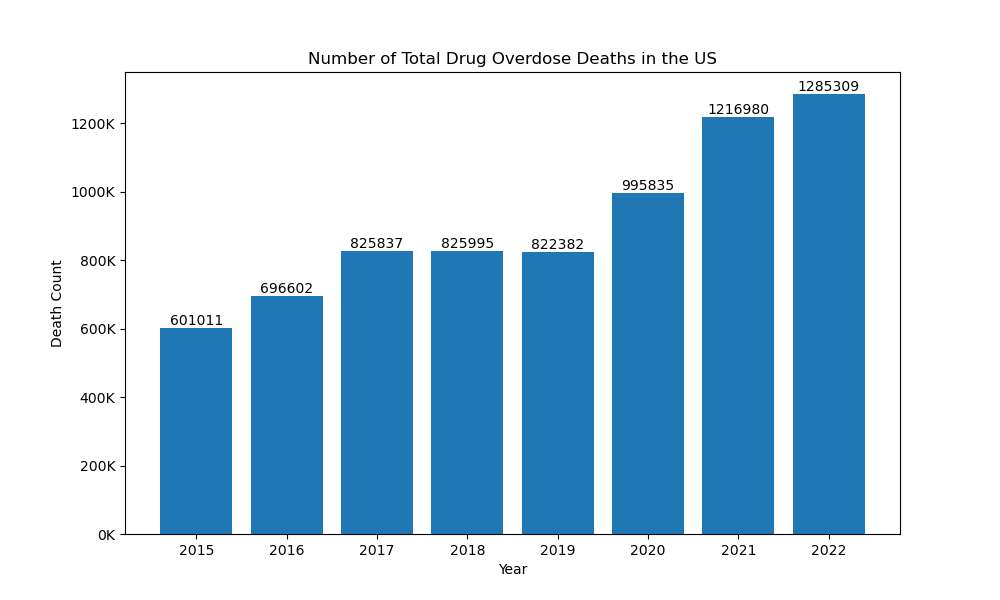

In [15]:
# Create lists for Year and Death Count
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
death_counts = [601011, 696602, 825837, 825995, 822382, 995835, 1216980, 1285309]

plt.figure(figsize=(10,6))
# Create the line graph
plt.bar(years, death_counts)

# Set plot title and labels
plt.title('Number of Total Drug Overdose Deaths in the US')
plt.xlabel('Year')
plt.ylabel('Death Count')


formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)

for i, count in enumerate(death_counts):
    plt.text(years[i], count, str(count), ha='center', va='bottom')
# Display the plot
plt.show()
plt.tight_layout()

In [45]:
#Defining a function to make summarized assumptions on the graph above
def calculate_percentage_increase(old_value, new_value):
    percentage_increase = ((new_value - old_value) / old_value) * 100
    return percentage_increase

#Percentage increase of drug overdose deaths from 2015-2022
calculate_percentage_increase(601011,1285309)

113.85781624629165

In [46]:
calculate_percentage_increase(995835,1216980)

22.206992122188918

Here in this graph we see that from 2015 up until 2022 there has been an overall increase of drug overdose deaths in the U.S. by about 113.86% . There was a moment in between these years from 2017-2019 when the overall deaths reamined almost the same with there even being a small decrease in 2019. We see the biggest jump in overdose deaths in between 2020 and 2021 with a total of 221,145 deaths or an increase of 22.21%.

Now, in the past 3 years lets look at which US states are affected most by drug overdoses.

In [16]:
# plt.savefig("Visualizations/Overall_overdose_deaths.png")

# Number of total drug overdose deaths by state in 2020 compared to 2021

In [55]:

state_index=filtered_deaths_by_state.set_index('State')

state_index


,Year,Reason for Death,Death Count
State,,,
AK,2015,Number of Drug Overdose Deaths,1472.0
AL,2015,Number of Drug Overdose Deaths,8818.0
AR,2015,Number of Drug Overdose Deaths,4616.0
AZ,2015,Number of Drug Overdose Deaths,14590.0
CA,2015,Number of Drug Overdose Deaths,56001.0
...,...,...,...
WA,2022,Number of Drug Overdose Deaths,29189.0
WI,2022,Number of Drug Overdose Deaths,21541.0
WV,2022,Number of Drug Overdose Deaths,16270.0


In [56]:
remove_yc=state_index.drop(index=('YC'))
remove_us=remove_yc.drop(index=('US'))

In [57]:
remove_us.tail(20)

,Year,Reason for Death,Death Count
State,,,
NJ,2022,Number of Drug Overdose Deaths,35517.0
NM,2022,Number of Drug Overdose Deaths,12201.0
NV,2022,Number of Drug Overdose Deaths,12614.0
NY,2022,Number of Drug Overdose Deaths,38286.0
OH,2022,Number of Drug Overdose Deaths,62083.0
OK,2022,Number of Drug Overdose Deaths,12690.0
OR,2022,Number of Drug Overdose Deaths,14601.0
PA,2022,Number of Drug Overdose Deaths,62771.0
RI,2022,Number of Drug Overdose Deaths,5433.0


In [58]:
state_deaths=remove_us.reset_index()
state_deaths

,State,Year,Reason for Death,Death Count
0,AK,2015,Number of Drug Overdose Deaths,1472.0
1,AL,2015,Number of Drug Overdose Deaths,8818.0
2,AR,2015,Number of Drug Overdose Deaths,4616.0
3,AZ,2015,Number of Drug Overdose Deaths,14590.0
4,CA,2015,Number of Drug Overdose Deaths,56001.0
...,...,...,...,...
403,VT,2022,Number of Drug Overdose Deaths,3123.0
404,WA,2022,Number of Drug Overdose Deaths,29189.0
405,WI,2022,Number of Drug Overdose Deaths,21541.0
406,WV,2022,Number of Drug Overdose Deaths,16270.0


In [59]:
#filtering for years 2020 and 2021
filter_years = state_deaths.loc[(state_deaths["Year"] == 2020) |
                                        (state_deaths["Year"] == 2021) | (state_deaths["Year"] == 2022)]

filter_years

,State,Year,Reason for Death,Death Count
255,AK,2020,Number of Drug Overdose Deaths,1591.0
256,AL,2020,Number of Drug Overdose Deaths,10624.0
257,AR,2020,Number of Drug Overdose Deaths,5325.0
258,AZ,2020,Number of Drug Overdose Deaths,28466.0
259,CA,2020,Number of Drug Overdose Deaths,92812.0
...,...,...,...,...
403,VT,2022,Number of Drug Overdose Deaths,3123.0
404,WA,2022,Number of Drug Overdose Deaths,29189.0
405,WI,2022,Number of Drug Overdose Deaths,21541.0
406,WV,2022,Number of Drug Overdose Deaths,16270.0


In [60]:
del filter_years['Reason for Death']



In [61]:
df=filter_years.reset_index(drop=True)
df

,State,Year,Death Count
0,AK,2020,1591.0
1,AL,2020,10624.0
2,AR,2020,5325.0
3,AZ,2020,28466.0
4,CA,2020,92812.0
...,...,...,...
148,VT,2022,3123.0
149,WA,2022,29189.0
150,WI,2022,21541.0
151,WV,2022,16270.0


In [62]:
# df.to_csv("Resources/2020_2021.csv")

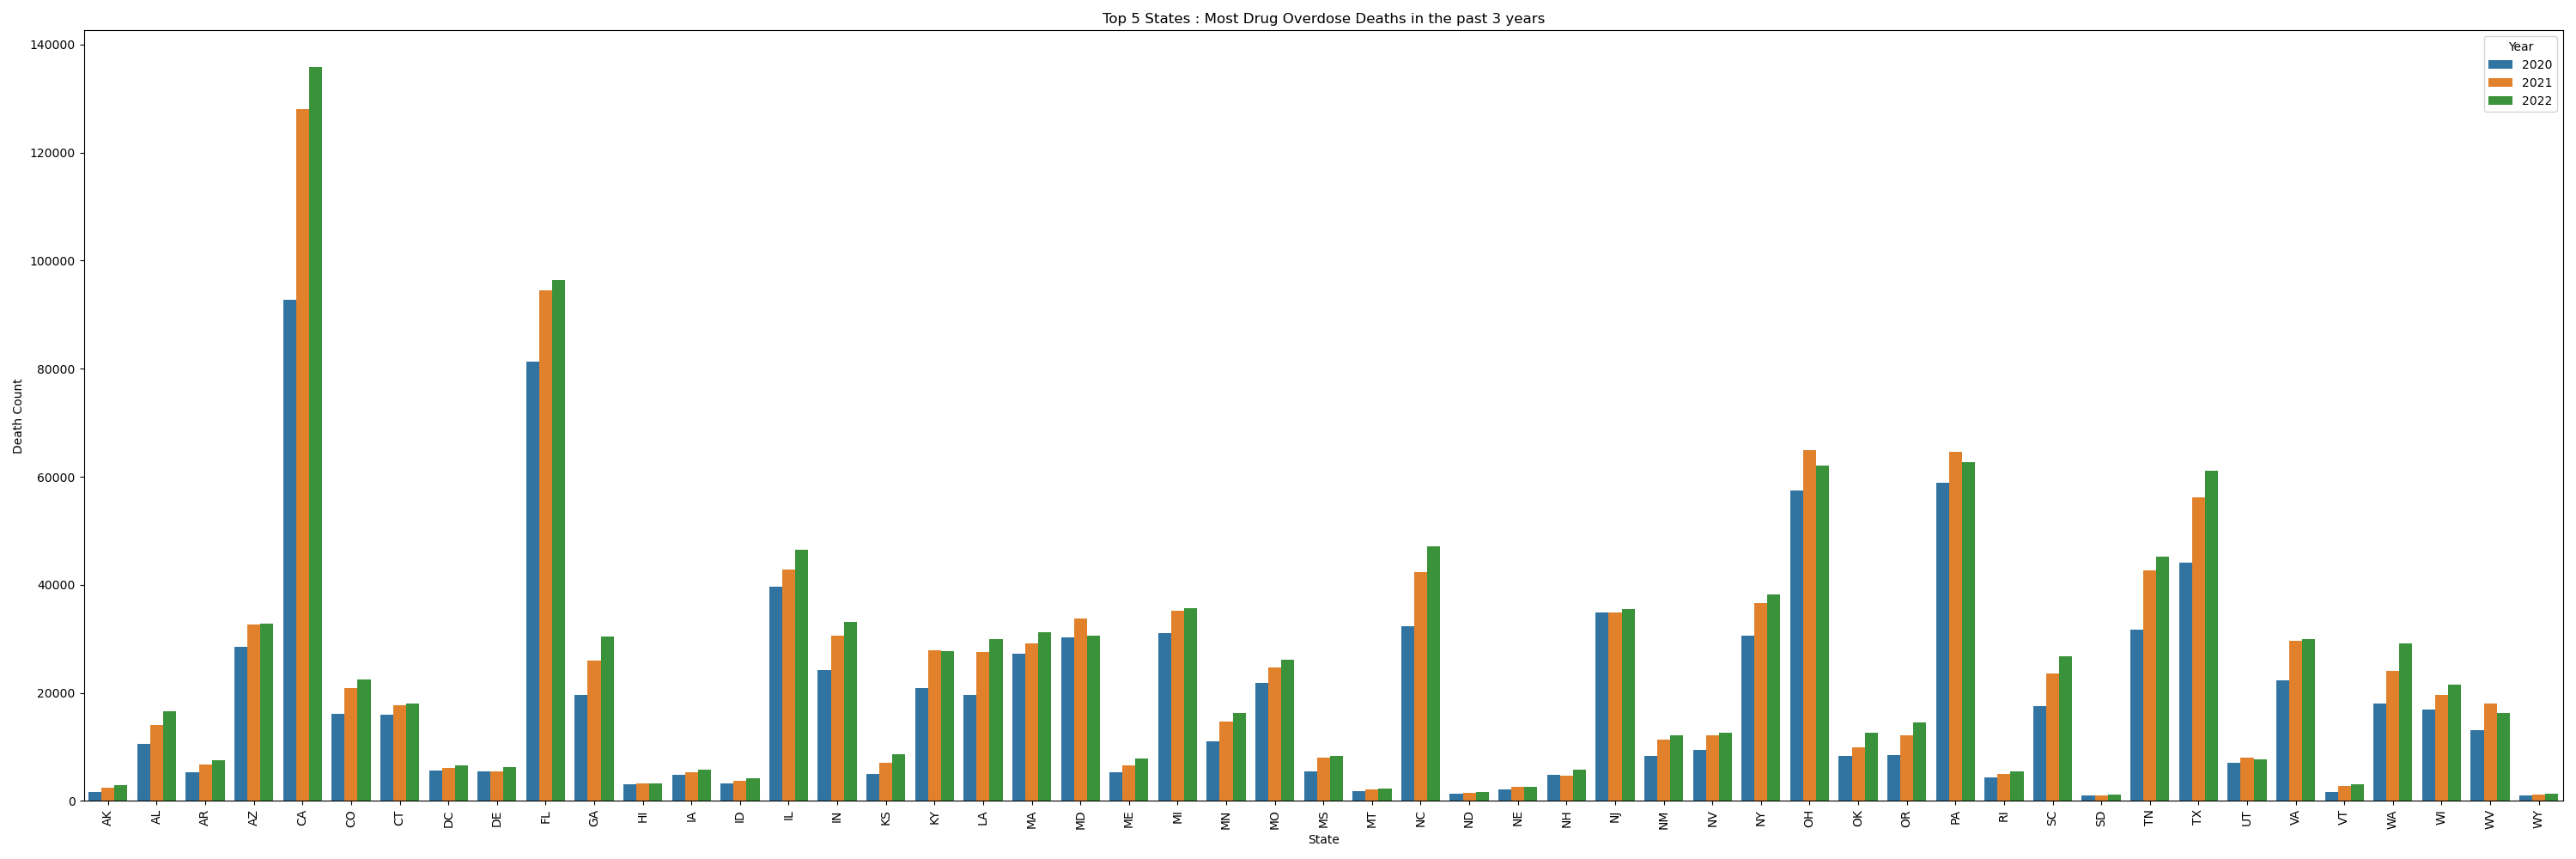

In [63]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Use seaborn to create a multiplot bar graph
sns.barplot(data=df, x='State', y='Death Count', hue='Year')

# Set plot title and labels
plt.title('Top 5 States : Most Drug Overdose Deaths in the past 3 years')
plt.xlabel('State')
plt.ylabel('Death Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [64]:
#defining a function to return total deaths combined for all years in graph above
def deaths(state):
    state_only=df[df['State'] == state ]
    combined_dc = state_only['Death Count'].sum()
    return combined_dc

print(deaths('CA'))
print(deaths('FL'))
print(deaths('PA'))
print(deaths('OH'))
print(deaths('TX'))

# fl_only=df[df['State'] == 'FL']
# combined_dc = fl_only['Death Count'].sum()
# print(combined_dc)

356691.0
272273.0
186224.0
184468.0
161322.0


In [65]:
#Average overdose death count for all states from 2020-2022
all_deaths = df['Death Count'].sum()
total_entries = len(df)

combined_average_death_count = all_deaths / total_entries

print(combined_average_death_count)

22295.516339869282


At first glance we see that California and Florida make up most of the overdose deaths in the US. The top 5 states with the most overdose deaths combined for all three years are as follows:

1. California : 356,691 Deaths
2. Florida : 272,273 Deaths
3. Pennsylvania: 186,224 Deaths
4. Ohio: 184,468 Deaths
5. Texas: 161,322 Deaths

The average combined overdose death count for all states is 22,296 Deaths

Now, lets take a look at what kinds of drugs are the cause of these overdoses.... Desmond follows

In [66]:
# plt.savefig("Visualizations/Overdoses_by_state_2020_2021")